#### Nama: Ahmad Yusuf Aditama
#### NIM: 09011381621098
#### Kelas: SK5B

### Heart Disease

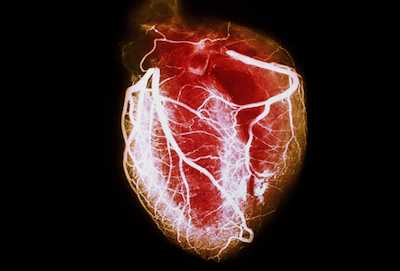

Heart Disease atau Penyakit jantung, adalah berbagai kondisi di mana terjadi penyempitan atau penyumbatan pembuluh darah yang dapat menyebabkan serangan jantung, nyeri dada, atau stroke.

Beberapa faktor yang dapat mempengaruhi penyakit jantung adalah:

    1) Semakin tua usia akan arteri semakin menyempit dan rapuh;
    2) Pria lebih memiliki risiko terkena penyakit jantung daripada wanita.
    3) Apabila ada anggota keluarga yang menderita gangguan jantung, maka risikonya meningkat.
    4) Rokok dapat menyebabkan penyempitan arteri dan carbon monoxit menyebabkan kerusakan vaskular.
    5) Memiliki riwayat tekanan darah tinggi, kadarlemak darah yang tinggi.
    6) Memiliki trauma mental atau stres psikologis pada jangka waktu panjang.


## Dataset

#### Informasi Dataset
Dataset ini telah dikumpuklan oleh Cleveland Clinic Foundation di Switzerlandia. Dataset yang digunakan dalam proyek ini berisi 14 feature dari Cleveland Clinic Foundation untuk penyakit jantung. Dataset menunjukkan tingkat penyakit jantung yang berbeda dari 1 dan 0 untuk tidak adanya penyakit. Dataset ini memiliki 303 baris data dengan 13 pengamatan terus menerus dari gejala yang berbeda.

#### Atribut Dataset
1. Age
2. Sex
3. ChestPain
4. RestBP
5. Chol
6. Fbs
7. RestECG
8. MaxHR
9. ExAng
10. Oldpeak
11. Slope
12. Ca
13. Thal
14. AHD

## Library

#### 1. Numpy
Digunakan untuk mengolah data yang berupa angka.

#### 2. Pandas
Digunakan untuk membaca data file .csv

#### 3. Preprocessing
Preprocessing disini digunakan untuk mengubah data menjadi format yang akan lebih mudah dan efektif diproses dalam jaringan saraf.

#### 4. Categorical
Berfungsi untuk mengkonversi data binary menjadi data yang dapat dikelompokkan, sehingga data tersebut dapat digunakan sebagai confusion matrix.

#### 5. Confusion Matriks
Merupakan salah satu metode yang dapat digunakan untuk mengukur kinerja suatu metode klasifikasi.

#### 6. Model & Layer
Model disini digunakan untuk membuat hidden layer dan untuk menggunakannya digunakanlah Library Sequential.  Sedangkan layer, menggunakan Dense yang akan melakukan training data.

#### 7. Matplotlib
Digunakan untuk menampilkan hasil dan proses dari pemodelan, yang hasilnya nanti akan berupa grafik.

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Activation
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

scaler= MinMaxScaler()

Using TensorFlow backend.


## Import Dataset

In [2]:
dataset = np.loadtxt("heart_disease.csv", delimiter=",")

In [3]:
dataset

array([[63.,  1.,  3., ...,  0.,  1.,  1.],
       [37.,  1.,  2., ...,  0.,  2.,  1.],
       [41.,  0.,  1., ...,  0.,  2.,  1.],
       ...,
       [68.,  1.,  0., ...,  2.,  3.,  0.],
       [57.,  1.,  0., ...,  1.,  3.,  0.],
       [57.,  0.,  1., ...,  1.,  2.,  0.]])

## Set data dan Target
Set data untuk feature yaitu kolom 1-13, dan kolom 14 sebagai target.

In [4]:
X = dataset[:,0:13]
Y = dataset[:,13]

## Scaling
Agar data tak memiliki standar deviasi yang tinggi, maka selanjutnya akan discaling, dimana nilai max adalah 1 dan minimal adalah 0

In [5]:
X_scaled=scaler.fit_transform(X)
X_scaled.shape

(303, 13)

## Categorical
Untuk membuat confusion matrix, diubahlah data yang awalnya binary menjadi categorical. Pada proses ini, library yang digunakan akan memilah kategori yang telah ada.

In [6]:
from keras.utils.np_utils import to_categorical
label_categorical=to_categorical(Y)

In [7]:
label_categorical.shape

(303, 2)

## Splitting
Data yang ada akan dibagi secara acak, dengan persentase 80% untuk data yang akan di training, dan 20% untuk data yang akan di testing

In [8]:
data_training, data_testing, target_training, target_testing = train_test_split(X_scaled, Y, test_size=0.2, 
                                                                                random_state=42)

## Modelling
Disini, saya menggunakan 3 layer dengan masing-masing masing-masing:
     1. Input 1 layer = 15 units Neural Network, 13 dimensi input, 2 activation relu.
     2. Output 1 layer = 1 unit Neural Network dengan menggunakan activation sigmoid

In [9]:
# create model
model = Sequential()
model.add(Dense(3, input_dim=13, activation='relu'))
model.add(Dense(3, input_dim=13, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

## Compile Data
Setelah dilakukan proses pemodelan, selanjutnya model tersebut di-compile sehingga menjadi Hidden Layer. Disini, digunakan loss MSE (Mean Square Error), dan metric Akurasi sebagai parameternya

In [10]:
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

##  Fit
Pada fungsi Fit ini, akan menghasilkan akurasi dan loss dari dataset Heart Disease. Proses pada training ini adalah:
1. Training data
2. Data validasi yaitu variabel data_testing dan target_testing
3. Banyaknya Epochs

In [11]:
history = model.fit(data_training,target_training, validation_data=(data_testing,target_testing), epochs=260)

Train on 242 samples, validate on 61 samples
Epoch 1/260
242/242 [==============================] - 0s 979us/step - loss: 0.3204 - acc: 0.4504 - val_loss: 0.3072 - val_acc: 0.4754
Epoch 2/260
242/242 [==============================] - 0s 58us/step - loss: 0.3164 - acc: 0.4504 - val_loss: 0.3036 - val_acc: 0.4754
Epoch 3/260
242/242 [==============================] - 0s 66us/step - loss: 0.3126 - acc: 0.4504 - val_loss: 0.3001 - val_acc: 0.4754
Epoch 4/260
242/242 [==============================] - 0s 66us/step - loss: 0.3087 - acc: 0.4504 - val_loss: 0.2966 - val_acc: 0.4754
Epoch 5/260
242/242 [==============================] - 0s 50us/step - loss: 0.3049 - acc: 0.4504 - val_loss: 0.2931 - val_acc: 0.4754
Epoch 6/260
242/242 [==============================] - 0s 54us/step - loss: 0.3015 - acc: 0.4504 - val_loss: 0.2896 - val_acc: 0.4754
Epoch 7/260
242/242 [==============================] - 0s 58us/step - loss: 0.2978 - acc: 0.4504 - val_loss: 0.2862 - val_acc: 0.4754
Epoch 8/260
242/

242/242 [==============================] - 0s 78us/step - loss: 0.1644 - acc: 0.7975 - val_loss: 0.1563 - val_acc: 0.8361
Epoch 122/260
242/242 [==============================] - 0s 66us/step - loss: 0.1640 - acc: 0.8017 - val_loss: 0.1554 - val_acc: 0.8361
Epoch 123/260
242/242 [==============================] - 0s 54us/step - loss: 0.1635 - acc: 0.7934 - val_loss: 0.1552 - val_acc: 0.8361
Epoch 124/260
242/242 [==============================] - 0s 54us/step - loss: 0.1631 - acc: 0.7975 - val_loss: 0.1548 - val_acc: 0.8197
Epoch 125/260
242/242 [==============================] - 0s 58us/step - loss: 0.1625 - acc: 0.8017 - val_loss: 0.1539 - val_acc: 0.8361
Epoch 126/260
242/242 [==============================] - 0s 95us/step - loss: 0.1621 - acc: 0.7934 - val_loss: 0.1533 - val_acc: 0.8525
Epoch 127/260
242/242 [==============================] - 0s 70us/step - loss: 0.1615 - acc: 0.7975 - val_loss: 0.1531 - val_acc: 0.8361
Epoch 128/260
242/242 [==============================] - 0s 74

242/242 [==============================] - 0s 54us/step - loss: 0.1299 - acc: 0.8471 - val_loss: 0.1270 - val_acc: 0.8525
Epoch 242/260
242/242 [==============================] - 0s 54us/step - loss: 0.1298 - acc: 0.8512 - val_loss: 0.1272 - val_acc: 0.8525
Epoch 243/260
242/242 [==============================] - 0s 70us/step - loss: 0.1297 - acc: 0.8512 - val_loss: 0.1267 - val_acc: 0.8525
Epoch 244/260
242/242 [==============================] - 0s 54us/step - loss: 0.1295 - acc: 0.8430 - val_loss: 0.1272 - val_acc: 0.8525
Epoch 245/260
242/242 [==============================] - 0s 58us/step - loss: 0.1293 - acc: 0.8430 - val_loss: 0.1269 - val_acc: 0.8525
Epoch 246/260
242/242 [==============================] - 0s 62us/step - loss: 0.1292 - acc: 0.8471 - val_loss: 0.1265 - val_acc: 0.8525
Epoch 247/260
242/242 [==============================] - 0s 54us/step - loss: 0.1292 - acc: 0.8471 - val_loss: 0.1257 - val_acc: 0.8525
Epoch 248/260
242/242 [==============================] - 0s 66

# Evaluasi Model
Setelah data di training, data dapat di-evaluasi. Melalui proses evaluasi model, hasil dari akurasi dapat dilihat.

In [12]:
scores = model.evaluate(data_testing, target_testing)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

61/61 [==============================] - 0s 66us/step

acc: 83.61%


## Visualilasi Proses Training
Setelah data diatas telah ditraining, setiap Loss pada training dapat ditampilkan dalam grafik. Plot model itu sendiri terdiri dari 2, yaitu Model Akurasi dan Model Loss. 

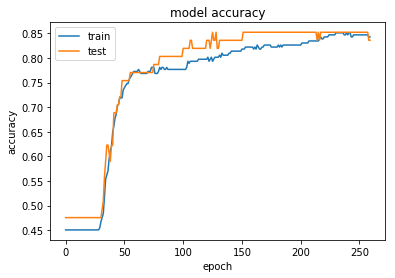

In [13]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [14]:
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


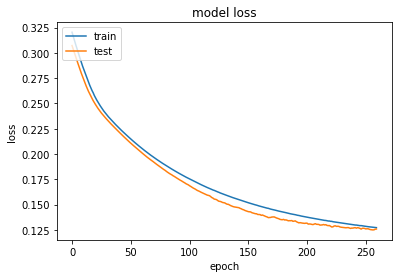

In [15]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Confusion Matrix
Fungsi untuk menghitung confusion matrix, dimana isi dari list confusion akan ditampung pada variabel TP, TN, FN, FP

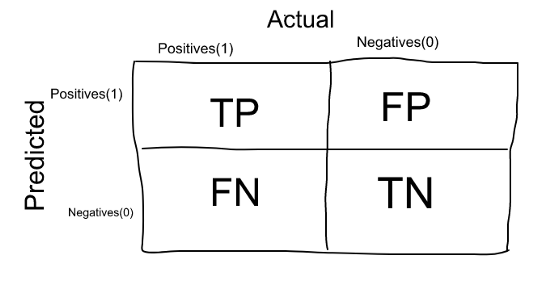

In [16]:
prediction = model.predict_classes(data_testing)
prediksi = pd.DataFrame(prediction)
target_testing = pd.DataFrame(target_testing)

In [17]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(target_testing, prediction)
print (cm)

[[26  3]
 [ 7 25]]


## Akurasi
Akurasi adalah jumlah prediksi yang tepat yang dibuat oleh model dan prediksi yang telah dibuat.
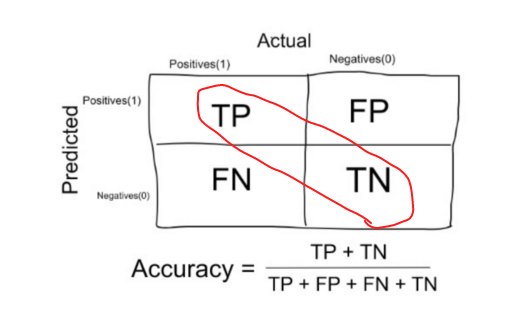

In [18]:
akurasi = ((cm[0,0]+cm[1,1])/(cm[0,0]+cm[0,1]+cm[1,0]+cm[1,1])*100)
akurasi

83.60655737704919